In [1]:
from numpy import *
import numpy as np
from scipy.linalg import lu_factor, lu_solve
import matplotlib.pyplot as plt

In [2]:
########################################################
#  Resolution de l'equation avec second membre egal a f
#  avec conditions limites de Dirichlet homogenes
#  dans l'intervalle (0,1)
########################################################
def maillage(nx):
    # Creation du maillage
    noeuds = linspace(0,1,nx+1)

    # Creation du tableau de correspondance
    elements = zeros((nx,2),dtype=int)
    elements[:,0] = arange(nx)
    elements[:,1] = arange(nx)+1

    return noeuds,elements


def matriceElementaire(Aelt,h):    
        # Calcul de la matrice elementaire       
        Aelt[0,0] =  1
        Aelt[0,1] = -1
        Aelt[1,0] = -1
        Aelt[1,1] =  1

        Aelt /= h

        return Aelt

In [3]:
# Linear system matrix Assembly
def assemblage(noeuds,elements,f):
    
    ########################################################
    # Mesh loading
    ########################################################
    
    
    # Mesh vertices coordinates
    X = noeuds[:]
    # Number of Vertices
    nbNoeuds=size(noeuds)
    # Number of Elements
    nbElem   = shape(elements)[0]
    
    
    ########################################################
    # Stifness matrix assembly
    ########################################################
    
    # Init stiffness matrix
    A=zeros((nbNoeuds,nbNoeuds));
    
    # Init Elementary stiffness matrix
    Aelt = zeros((2,2));
    
    # Boucle sur les elements
    for j in range(nbElem):

        # Numeros globaux des extremites du segments
        i1=elements[j,0]
        i2=elements[j,1]
        I = [i1, i2]

        # Coordonnees des deux extremites
        X1 = noeuds[i1]
        X2 = noeuds[i2]
        
        # Calcul de la longueur de l'element
        h = abs(X2-X1)

        matriceElementaire(Aelt,h)
        
        # Assemblage des matrices elementaires
        for i1 in [0,1]:
            for i2 in [0,1]:
                I1 = I[i1]
                I2 = I[i2]
                A[I1,I2] += Aelt[i1,i2]

        
        # Fin de boucle sur les elements
        
    ########################################################
    # Linear system Right Hand Side
    ########################################################

    # Init RHS
    F= zeros((nbNoeuds))
    
    # Boucle sur les segments
    for j in range(nbElem):
        i1=elements[j,0]
        i2=elements[j,1]
        
        F[i1]+=h/2*f(noeuds[i1])
        F[i2]+=h/2*f(noeuds[i2])        
        
        
        
    ########################################################
    # Strong formulation of the Dirichlet Boundary conditions
    ########################################################
    
    # Loop on Vertices
    
    for j in range(nbNoeuds):
        # Find vertices located on the boundary
        if X[j]==0 or X[j]==1:
            # Pseudo-elimination in the system matrix
            A[j,:] = 0
            A[j,j] = 1
            # Pseudo-elimination in the Right-Hand-Side
            F[j] = 0


    return A,F

In [12]:
nx=10
noeuds,elements = maillage(nx)
print(noeuds)
print(elements[1,0])
print(elements[1,1])
print(elements)
print(shape(elements))
print(assemblage(noeuds, elements, f))

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
1
2
[[ 0  1]
 [ 1  2]
 [ 2  3]
 [ 3  4]
 [ 4  5]
 [ 5  6]
 [ 6  7]
 [ 7  8]
 [ 8  9]
 [ 9 10]]
(10, 2)


NameError: name 'f' is not defined

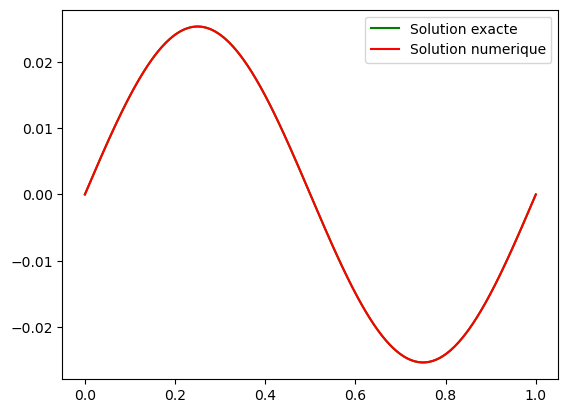

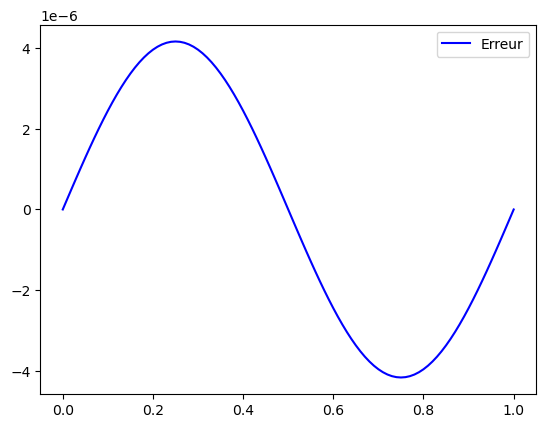

Erreur L2  2.9472961826768573e-06


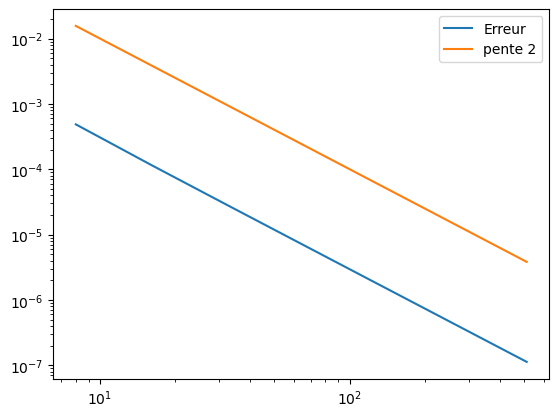

In [4]:
########################################################
# Resolution de systeme: LU
########################################################

# second membre
f     = lambda x: sin(2*pi*x)

# solution exacte calcule a la main
exact = lambda x: sin(2*pi*x)/pi/pi/4

nx = 100
noeuds,elements = maillage(nx)
A,F             = assemblage(noeuds,elements,f)


# decomposition LU
lu, piv = lu_factor(A)
U       = lu_solve((lu,piv),F)

X = noeuds
V =  exact(X)
Err = V - U


### Affichage solution
xx = linspace(0,1,500)
plt.plot(xx,exact(xx),'g',label='Solution exacte')
plt.plot(X,U,'r',label='Solution numerique')
plt.legend(loc='best')
plt.show()

plt.plot(X,Err,'b',label='Erreur')
plt.legend(loc='best')
plt.show()

# L2 erreur
ErrL2 = sqrt(sum(Err**2)/nx)
print("Erreur L2 ", ErrL2)


tab_err = []
tab_n   = 2**arange(3,10)

for nx in tab_n:
    noeuds,elements = maillage(nx)
    A,F             = assemblage(noeuds,elements,f)
    lu, piv = lu_factor(A)
    U       = lu_solve((lu,piv),F)
    
    X     = noeuds
    V     = exact(X)
    Err   = V - U
    ErrL2 = sqrt(sum(Err**2)/nx)

    tab_err += [ErrL2]

plt.loglog(tab_n, tab_err, label="Erreur")    
plt.loglog(tab_n, 1./tab_n**2, label="pente 2")
plt.legend(loc='best')
plt.show()

Exercice1
-----

Pour résoudre le problème $-u''=f$ dans $(0,1)$ avec $f(x)=1$ et les conditions aux limites $u(0)=0$ et $u(1)=0$, on va utiliser les codes precedents.

La fonction $f(x)$ et la solution exacte $u(x)$ pour le problème. Dans ce cas, la solution exacte est $u(x) = \frac{x(1-x)}{2}$.

Ensuite, nous allons appeler la fonction maillage pour créer le maillage et la fonction assemblage pour assembler la matrice de rigidité $A$ et le second membre $F$.

Enfin, nous allons résoudre le système linéaire $Au = F$ en utilisant la décomposition LU et la fonction lu_solve et afficher la solution numérique $u$ et la solution exacte $u_e$.

Voici le code:

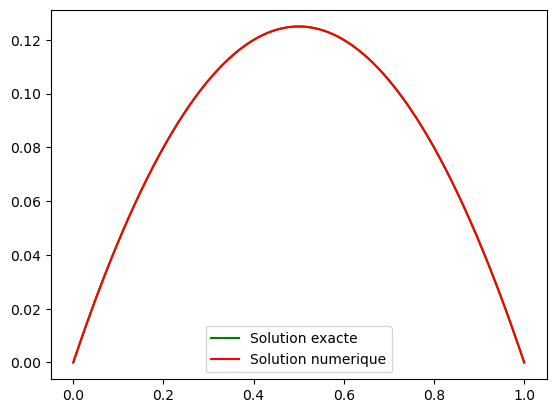

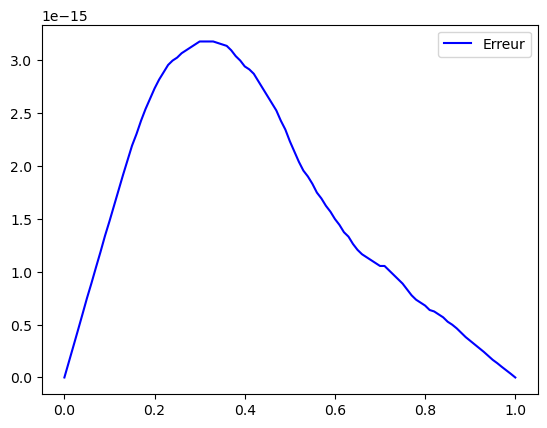

Erreur L2  1.935080555949954e-15


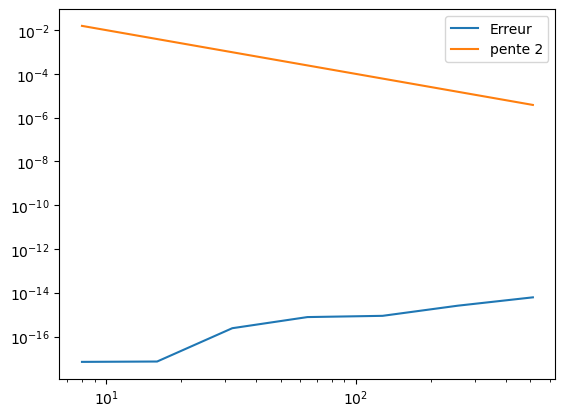

In [5]:
########################################################
# Resolution de systeme: LU
########################################################


#f1:  f(x)=1 est une fonction costante, la solution exacte est une polynomiale quadratique
#tq satisfait la condition de bound-homogeneous de Dirichlet
#et la solution exacte est u(x) = x(1-x)/2.


# second 
f     = lambda x: 1

# solution exacte calcule a la main
exact = lambda x: x*(1-x)*0.5

nx = 100
noeuds,elements = maillage(nx)
A,F             = assemblage(noeuds,elements,f)


# decomposition LU
lu, piv = lu_factor(A)
U       = lu_solve((lu,piv),F)

X = noeuds
V =  exact(X)
Err = V - U


### Affichage solution
xx = linspace(0,1,500)
plt.plot(xx,exact(xx),'g',label='Solution exacte')
plt.plot(X,U,'r',label='Solution numerique')
plt.legend(loc='best')
plt.show()

plt.plot(X,Err,'b',label='Erreur')
plt.legend(loc='best')
plt.show()

# L2 erreur
ErrL2 = sqrt(sum(Err**2)/nx)
print("Erreur L2 ", ErrL2)


tab_err = []
tab_n   = 2**arange(3,10)

for nx in tab_n:
    noeuds,elements = maillage(nx)
    A,F             = assemblage(noeuds,elements,f)
    lu, piv = lu_factor(A)
    U       = lu_solve((lu,piv),F)
    
    X     = noeuds
    V     = exact(X)
    Err   = V - U
    ErrL2 = sqrt(sum(Err**2)/nx)

    tab_err += [ErrL2]

plt.loglog(tab_n,tab_err, label="Erreur")    
plt.loglog(tab_n,1./tab_n**2, label="pente 2")
plt.legend(loc='best')
plt.show()

on a besoin devaluer la forme bilinaire:

$$(\nabla u, \nabla v) = \int_0^1 u'(x) v'(x) dx$$

ou $u$ et $v$ les test fonctions dans l'espace  Sobolev $H_0^1(0,1)$ ($x=0$ and $x=1$). On peut avoir

$$u(x) \approx u_1 \phi_1(x) + u_2 \phi_2(x)$$

$$v(x) \approx v_1 \phi_1(x) + v_2 \phi_2(x)$$

ou $\phi_1(x) = (x_2 - x)/(x_2 - x_1)$ and $\phi_2(x) = (x - x_1)/(x_2 - x_1)$ les elements finis

$$(\nabla u, \nabla v) \approx \frac{1}{h} \begin{bmatrix} -1 & 1 \ 1 & -1 \end{bmatrix} \begin{bmatrix} u_1 \ u_2 \end{bmatrix} \cdot \begin{bmatrix} v_1 \ v_2 \end{bmatrix}$$




In [6]:
#Q1 pour f1 

def exact_solution(x):
    u = -(1/np.pi**2)*np.sin(np.pi*x) + (1/9/np.pi**2)*np.sin(3*np.pi*x)
    return u


In [7]:
#Q2 pour f1

def assemblage2(noeuds, elements, f):
    n = len(noeuds)-1
    A = zeros((n+1,n+1))
    F = zeros(n+1)
    h = 1.0/n
    
    for i in range(len(elements)):
        elt = elements[i]
        x1, x2 = noeuds[elt[0]], noeuds[elt[1]]
        Aelt = matriceElementaire(zeros((2,2)),h)
        Felt = zeros(2)
        Felt[0] = Felt[0] + f(x1)*h/2
        Felt[1] = Felt[1] + f(x2)*h/2
        
        for k in range(2):
            ig = elt[k]
            for l in range(2):
                jg = elt[l]
                A[ig,jg] = A[ig,jg] + Aelt[k,l]
            F[ig] = F[ig] + Felt[k]
    
    return A, F


nx = 100
noeuds, elements = maillage(nx)
A, F = assemblage(noeuds, elements, lambda x: 1)

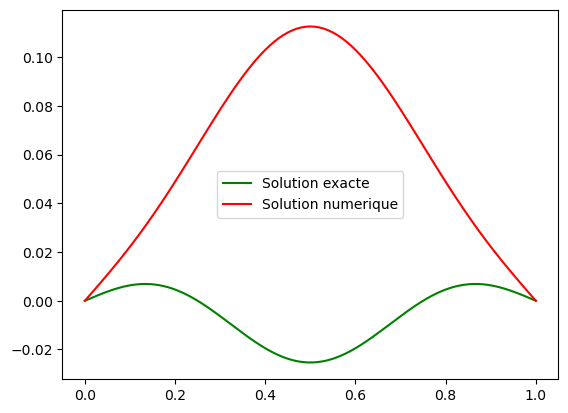

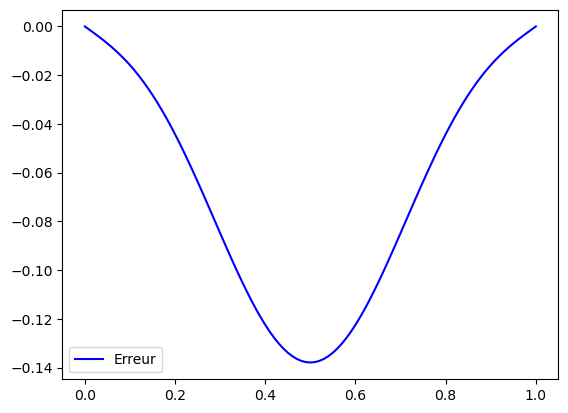

Erreur L2  0.08235304187466265


/var/folders/0z/zmkgzlyx6_j3whsg_d38y3xw0000gn/T/ipykernel_750/4081936916.py:47: LinAlgWarning: Diagonal number 9 is exactly zero. Singular matrix.
  lu, piv = lu_factor(A)
/var/folders/0z/zmkgzlyx6_j3whsg_d38y3xw0000gn/T/ipykernel_750/4081936916.py:47: LinAlgWarning: Diagonal number 17 is exactly zero. Singular matrix.
  lu, piv = lu_factor(A)
/var/folders/0z/zmkgzlyx6_j3whsg_d38y3xw0000gn/T/ipykernel_750/4081936916.py:47: LinAlgWarning: Diagonal number 33 is exactly zero. Singular matrix.
  lu, piv = lu_factor(A)
/var/folders/0z/zmkgzlyx6_j3whsg_d38y3xw0000gn/T/ipykernel_750/4081936916.py:47: LinAlgWarning: Diagonal number 65 is exactly zero. Singular matrix.
  lu, piv = lu_factor(A)
/var/folders/0z/zmkgzlyx6_j3whsg_d38y3xw0000gn/T/ipykernel_750/4081936916.py:47: LinAlgWarning: Diagonal number 129 is exactly zero. Singular matrix.
  lu, piv = lu_factor(A)
/var/folders/0z/zmkgzlyx6_j3whsg_d38y3xw0000gn/T/ipykernel_750/4081936916.py:47: LinAlgWarning: Diagonal number 257 is exactly zer

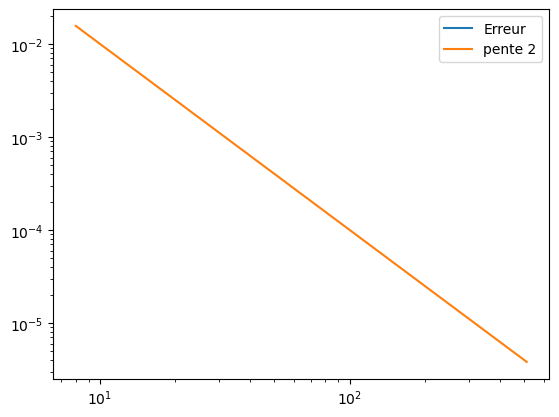

In [8]:
#f2: f(x)=sin(pi*x)- sin(3*pi*x),
#et la solution exacte est (1/(pi**2 - 9*pi**2))*sin(pi*x) + (1/(9*pi**2 - pi**2))*sin(3*pi*x)


# second 
f     = lambda x: sin(pi*x)- sin(3*pi*x)

# solution exacte calcule a la main
exact = lambda x: (1/(pi**2 - 9*pi**2))*sin(pi*x) + (1/(9*pi**2 - pi**2))*sin(3*pi*x)

nx = 100
noeuds,elements = maillage(nx)
A,F             = assemblage(noeuds,elements,f)


# decomposition LU
lu, piv = lu_factor(A)
U       = lu_solve((lu,piv),F)

X = noeuds
V =  exact(X)
Err = V - U


### Affichage solution
xx = linspace(0,1,500)
plt.plot(xx,exact(xx),'g',label='Solution exacte')
plt.plot(X,U,'r',label='Solution numerique')
plt.legend(loc='best')
plt.show()

plt.plot(X,Err,'b',label='Erreur')
plt.legend(loc='best')
plt.show()

# L2 erreur
ErrL2 = sqrt(sum(Err**2)/nx)
print("Erreur L2 ", ErrL2)


tab_err = []
tab_n   = 2**arange(3,10)

for nx in tab_n:
    noeuds,elements = maillage(nx)
    A,F             = assemblage2(noeuds,elements,f)
    lu, piv = lu_factor(A)
    U       = lu_solve((lu,piv),F)
    
    X     = noeuds
    V     = exact(X)
    Err   = V - U
    ErrL2 = sqrt(sum(Err**2)/nx)

    tab_err += [ErrL2]
    

plt.loglog(tab_n,tab_err, label="Erreur")    
plt.loglog(tab_n,1./tab_n**2, label="pente 2")
plt.legend(loc='best')
plt.show()

In [9]:
#Q1 pour f2 
#comme on a a(u,v) = ∫_0^1 u'v' dx
#par le forme 
#on calcule

def stiffness_element_matrix(h):
    Aelt = np.array([[1, -1],
                     [-1, 1]], dtype=float)
    Aelt /= h
    return Aelt


La dérivée seconde de la fonction de base des éléments finis linéaires $\phi_i$ est une fonction constante par morceaux de valeur $-1/h_i$ au nœud $i$ et $1/h_{i+1}$ au nœud $i+1$, où $h_i$ est la longueur du $i$-ème élément




In [10]:
#Q3 pour f2

def assemblage2_2(noeuds, elements, f):
    n = len(noeuds) - 1  # nb des elemenets 
    
    A = np.zeros((n+1, n+1))
    F = np.zeros(n+1)


    for i in range(n):
        x0 = noeuds[elements[i,0]]
        x1 = noeuds[elements[i,1]]
        h = x1 - x0
        Aelt = np.zeros((2,2))
        Aelt = matriceElementaire(Aelt,h)
        for j in range(2):
            for k in range(2):
                A[elements[i,j], elements[i,k]] += Aelt[j,k]

    #Dirichlet
    A[0,:] = 0
    A[0,0] = 1
    A[-1,:] = 0
    A[-1,-1] = 1

    #droite
    for i in range(n):
        x0 = noeuds[elements[i,0]]
        x1 = noeuds[elements[i,1]]
        h = x1 - x0
        Felt = np.zeros(2)
        x = np.array([x0, x1])
        Felt[0] = h/6*(f(x[0]) + 4*f((x[0]+x[1])/2) + f(x[1]))
        Felt[1] = h/6*(f(x[1]) + 4*f((x[0]+x[1])/2) + f(x[0]))
        for j in range(2):
            F[elements[i,j]] += Felt[j]

    #application
    F[0] = 0
    F[-1] = 0

    return A, F

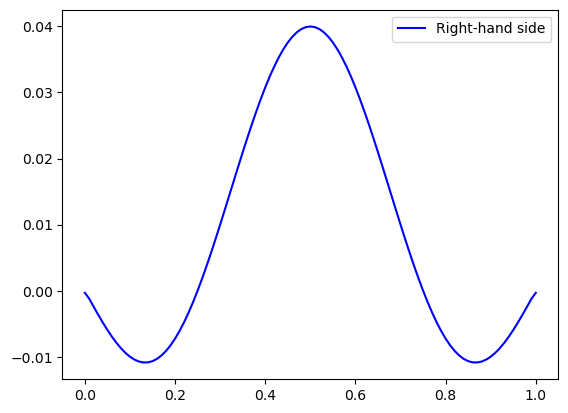

In [11]:
#Q3 pour f2

import numpy as np
import matplotlib.pyplot as plt

def rhs_element(xa, xb, f, h):
    # Using midpoint rule
    return h * f(0.5 * (xa + xb))

def rhs_assemble(nodes, conn, f, h):
    n = len(nodes) - 1
    rhs = np.zeros((n+1,))

    for i in range(n):
        xa, xb = nodes[i:i+2]
        rhs[i:i+2] += rhs_element(xa, xb, f, h)

    return rhs

def mesh(nx):
    nodes = np.linspace(0, 1, nx+1)

    #matrice
    conn = np.zeros((nx, 2), dtype=int)
    conn[:, 0] = np.arange(nx)
    conn[:, 1] = np.arange(nx)+1

    return nodes, conn

nx = 100
nodes, conn = mesh(nx)
h = 1 / nx
f = lambda x: np.sin(np.pi * x) - np.sin(3 * np.pi * x)
rhs = rhs_assemble(nodes, conn, f, h)

plt.plot(nodes, rhs, 'b', label='Right-hand side')
plt.legend(loc='best')
plt.show()



In [12]:
import numpy as np
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

nx = 100
x = np.linspace(0, 1, nx+1)

def f(x):
    return np.sin(np.pi*x) - np.sin(3*np.pi*x)

def exact_solution(x):
    u = -(1/np.pi**2)*np.sin(np.pi*x) + (1/9/np.pi**2)*np.sin(3*np.pi*x)
    return u



In [13]:
############
ARRETE D ICI 

SyntaxError: invalid syntax (622084786.py, line 2)

In [14]:
def Simpson(f, A, b, n):
#approximation de l'intégrale de la fonction f 

    h = (b-A)/n
    x = linspace(A,b,n+1)
    y = f(x)
    INT = h/6 * (y[0] + 4*y[1:-1:2].sum() + 2*y[2:-1:2].sum() + y[-1])
    
    return INT

#calcul de l'intégrale de f(x) sur I= (0,1)
f = lambda x: sin(pi*x) - sin(3*pi*x)
INT = simpson(f, 0, 1, 1000)
print("Intégrale de f(x) sur (0,1) : ", I)


NameError: name 'simpson' is not defined

Pour calculer l'erreur d'approximation, nous pouvons utiliser la formule d'erreur de la méthode de Simpson:

$$ E_n = -\frac{b-a}{180}h^4f^{(4)}(y) $$

où est la dérivée quatrième de $f(x)$.

Comme $f(x)$ est deux fois différentiable sur $(0,1)$, nous avons $ 16\pi^4(\sin(y\pi)-9\sin(3y\pi))$. Ainsi, l'erreur d'approximation est donnée par:

$$ E_n = \frac{1}{180n^4}16\pi^4\left|\sin(y\pi)-9\sin(3y\pi)\right| $$

où $y \in (0,1)$ est un nombre réel inconnu.

In [87]:
#Pour l'erreur relative, on utilise la formule suivante :
#err relative= |solution numerique - solution exact|_2 / |solution exacte|_2
# decomposition LU
A,F             = assemblage(noeuds,elements,f)
lu  = splu(A) #sinon le pb de la matrice spars!!!
U   = lu.solve(F)
Err = V - U
# L2 erreur et erreur relative
ErrL2 = sqrt(integrate.simps(Err**2,X)) 
#integrate.simps(f(linspace(x0,x1,5)),linspace(x0,x1,5)) 
#calcul la méthode de Simpson
ErrRel = ErrL2 / sqrt(integrate.simps(V**2,X))
print("Erreur L2 : ", ErrL2)
print("Erreur relative : ", ErrRel)

Erreur L2 :  0.08235639810819659
Erreur relative :  6.5026005538121945


Exercice 2
------

In [ ]:
#Pour la modification on a besoin de changer la dimension de matrice,

from numpy import *
from scipy.sparse import lil_matrix, csr_matrix
from scipy.sparse.linalg import spsolve, factorized

import matplotlib.pyplot as plt


def maillage(nx):
    # Creation du maillage
    noeuds = linspace(0,1,nx+1)

    # Creation du tableau de correspondance
    elements = zeros((nx,2),dtype=int)
    elements[:,0] = arange(nx)
    elements[:,1] = arange(nx)+1

    return noeuds,elements

def matriceElementaire(Aelt, Felt, h):    
    # Calcul de la matrice elementaire et du vecteur elementaire
    Aelt[0,0] += 1/h + h/3
    Aelt[0,1] -= 1/h + h/6
    Aelt[1,0] -= 1/h + h/6
    Aelt[1,1] += 1/h + h/3
    
    Felt[0] += h/2
    Felt[1] += h/2

    return Aelt, Felt


def assemblage(noeuds,elements,f):
    # Assemblage de la matrice globale et du second membre

    nx = len(noeuds)-1
    A  = lil_matrix((nx+1,nx+1))
    F  = zeros(nx+1)

    for i in range(nx):
        x1 = noeuds[i]
        x2 = noeuds[i+1]
        h  = x2 - x1
        
        # Calcul de la matrice elementaire et du vecteur elementaire
        Aelt = zeros((2,2))
        Felt = zeros(2)
        Aelt, Felt = matriceElementaire(Aelt, Felt, h)
        
        # Assemblage de la matrice globale et du second membre
        for j in range(2):
            J = elements[i,j]
            F[J] += Felt[j]*f((x1+x2)/2)
            for k in range(2):
                K = elements[i,k]
                A[J,K] += Aelt[j,k]

    A = csr_matrix(A)
    return A,F


# Resolution de systeme: factorization de la matrice globale
########################################################

# solution exacte calculee a la main
exact = lambda x: 1 - x*x/2 + x/2*sinh(x)/sinh(1)

tab_n = [10, 20, 40, 80]
for nx in tab_n:
    noeuds, elements = maillage(nx)
    A, F = assemblage(noeuds, elements, lambda x: 1)
    U = factorized(A)(F)
    
    X = noeuds
    V = exact(X)
    Err = V - U

    plt.plot(X, U, label='Numerical, n = {}'.format(nx))
    plt.plot(X, V, '--', label='Exact')
    plt.legend()
    plt.title('Solution, n = {}'.format(nx))
    plt.show()

    plt.plot(X, Err,
